In [1]:
import os
import sys

# Add parent directory lfi to sys.path
sys.path.insert(0, os.path.abspath('..'))
import lfi
from lfi import simulators, priors


2024-12-19 11:05:04.199 | INFO     | lfi.config:<module>:11 - PROJ_ROOT path is: C:\Users\Theodora\Documents\master2\sbi


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

# ABC

In [3]:
import lfi.inference.abc

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
np.random.seed(21355)

## D=2

In [5]:
# Define parameters
D = 2
budget = 1_000
prior = priors.UniformPrior(low=-2, high=2, dim=D)
simulator = simulators.GaussianNoise(sigma_noise=0.1)
observation = np.random.uniform(-2,2, size=(1,D))

In [6]:
print(f"True observation: {observation}")

True observation: [[ 1.03658306 -0.87433446]]


In [7]:
abc = lfi.inference.abc.ABCRejection(
    prior=prior,
    simulator=simulator,
    observation=observation,
    tolerance=0.7)

In [8]:
posterior_samples, time = abc.fit_and_sample(budget=budget, num_samples=100)


Training time: 0.01 seconds


In [9]:
print(f"Inference time: {time}")

Inference time: 0.007006900035776198


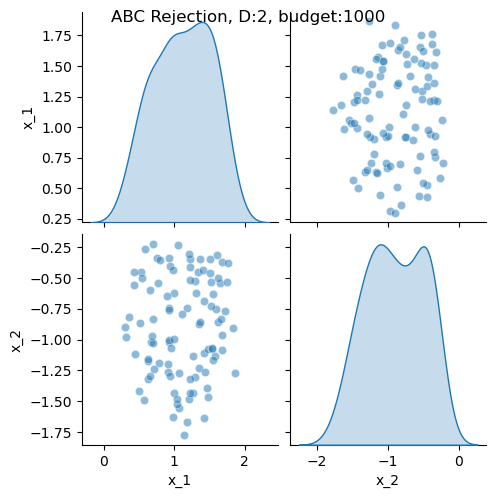

In [10]:
abc.plot_posterior_samples(
    samples=posterior_samples,
    posterior_modes=None,
    subset_dims=[0,1],
    budget=budget)

# SMC

## D=2

In [11]:
import lfi.inference.smc

In [12]:
np.random.seed(21355)

In [13]:
D = 2
budget = 1_000
prior = priors.UniformPrior(low=-2, high=2, dim=D)
simulator = simulators.GaussianNoise(sigma_noise=0.1)
observation = np.random.uniform(-2,2,size=(1,D))
tolerance_sequence = [1, 0.5, 0.2]

In [14]:
print(f"True observation: {observation}")

True observation: [[ 1.03658306 -0.87433446]]


In [15]:
smc = lfi.inference.smc.SMCInference(
    prior=prior,
    simulator=simulator,
    observation=observation,
    tolerance_sequence=tolerance_sequence)

In [16]:
posterior_samples, time = smc.fit_and_sample(budget=budget, num_samples=100)

Starting Sequential Monte Carlo Inference
Round 1/3, Tolerance: 1
Round 1 complete. Accepted particles: 172
Round 2/3, Tolerance: 0.5
Round 2 complete. Accepted particles: 193
Round 3/3, Tolerance: 0.2
Round 3 complete. Accepted particles: 127
Final posterior: (100, 2)

Training time: 0.01 seconds


In [17]:
print(f"Inference Time: {time}")

Inference Time: 0.009303300001192838


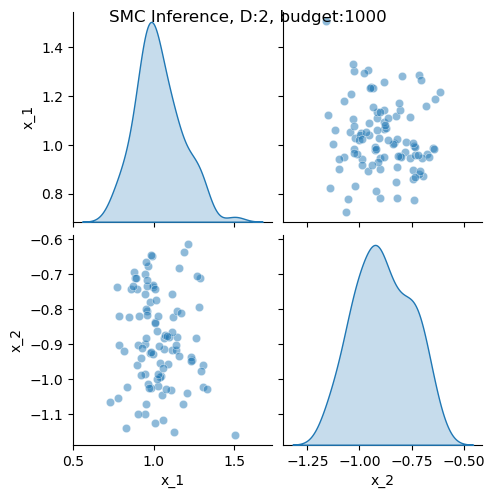

In [18]:
smc.plot_posterior_samples(
    samples=posterior_samples,
    posterior_modes=None,
    subset_dims=[0,1],
    budget=budget)

In [16]:
print(f"Seq 1: {tolerance_sequence[0]}, mean: {posterior_samples[0].mean(axis=0)}, std: {posterior_samples[0].std(axis=0)}")
print(f"Seq 2: {tolerance_sequence[1]}, mean: {posterior_samples[1].mean(axis=0)}, std: {posterior_samples[1].std(axis=0)}")
print(f"Seq 3: {tolerance_sequence[2]}, mean: {posterior_samples[2].mean(axis=0)}, std: {posterior_samples[2].std(axis=0)}")

Seq 1: 0.7, mean: [ 1.0897727 -0.8382218], std: [0.36919883 0.3469112 ]
Seq 2: 0.5, mean: [ 1.0461335  -0.90448784], std: [0.24848604 0.26756088]
Seq 3: 0.1, mean: [ 1.04607652 -0.87939136], std: [0.09518196 0.10358418]
